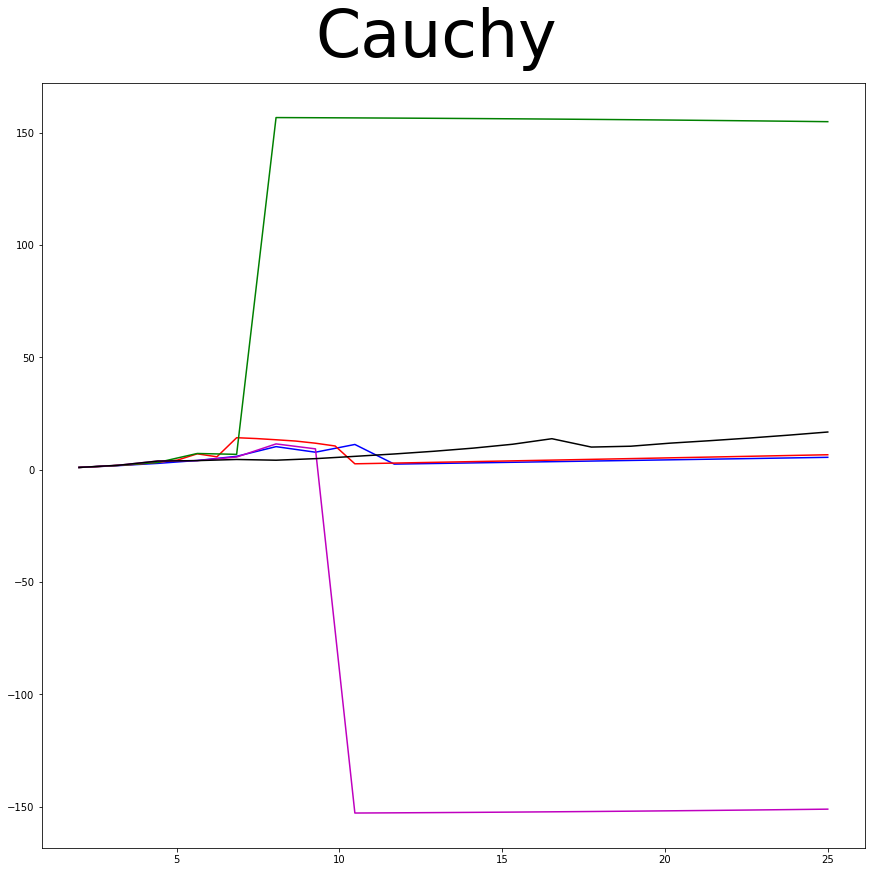

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

def f1(x, y):
    return x + y

def f2(x, y):
    return x * y / (x * x - y * y)
    
def euler(f, a, b, y0, n):
    h = (b - a) / (n - 1.0)
    x = list()
    y = list()
    x.append(a)
    y.append(y0)
    for i in range(n - 1):
        x.append(x[i] + h)
        y.append(y[i] + h * f(x[i], y[i]))
    return x, y

def euler1mod(f, a, b, y0, n):
    h = (b - a) / (n - 1.0)
    x = list()
    y = list()
    x.append(a)
    y.append(y0)
    for i in range(0, 2 * (n - 1), 2):
        x.append(x[i] + h / 2.0)
        y.append(y[i] + h * f(x[i], y[i]) / 2.0)
        x.append(x[i] + h)
        y.append(y[i] + h * f(x[i + 1], y[i + 1]))
    return x, y

def euler2mod(f, a, b, y0, n):
    h = (b - a) / (n - 1)
    x = list()
    y = list()
    x.append(a)
    y.append(y0)
    for i in range(n - 1):
        fi = f(x[i], y[i])
        t = y[i] + h * fi
        x.append(x[i] + h)
        y.append(y[i] + h * (fi + f(x[i + 1], t)) / 2.0)
    return x, y

def rungekutta(f, a, b, y0, n):
    h = (b - a) / (n - 1)
    x = list()
    y = list()
    x.append(a)
    y.append(y0)
    for i in range(n - 1):
        k1 = h * f(x[i], y[i])
        k2 = h * f(x[i] + h / 2, y[i] + k1 / 2)
        k3 = h * f(x[i] + h / 2, y[i] + k2 / 2)
        k4 = h * f(x[i] + h, y[i] + k3)
        x.append(x[i] + h)
        y.append(y[i] + (k1 + 2 * k2 + 2 * k3 + k4) / 6.0)
    return x, y

def predcorr(f, a, b, y0, n):
    h = (b - a) / (n - 1)
    x = list()
    y = list()
    fs = list()
    x.append(a)
    y.append(y0)
    fs.append(f(x[0], y[0]))
    for i in range(3):
        k1 = h * fs[i]
        k2 = h * f(x[i] + h / 2, y[i] + k1 / 2)
        k3 = h * f(x[i] + h / 2, y[i] + k2 / 2)
        k4 = h * f(x[i] + h, y[i] + k3)
        x.append(x[i] + h)
        y.append(y[i] + (k1 + 2 * k2 + 2 * k3 + k4) / 6.0)
        fs.append(f(x[i + 1], y[i + 1]))
    for i in range(3, n - 1):
        x.append(x[i] + h)
        ty = y[i] + h * (55 * fs[i] - 59 * fs[i - 1] + 37 * fs[i - 2] - 9 * fs[i - 3]) / 24.0
        tf = f(x[i + 1], ty)
        y.append(y[i] + h * (9 * tf + 19 * fs[i] - 5 * fs[i - 1] + fs[i - 2]) / 24.0)
        fs.append(f(x[i + 1], y[i + 1]))
    return x, y
    
fig, axs = plt.subplots(1, figsize=tuple((12.0, 12.0)), constrained_layout=True)
fig.suptitle("Cauchy", fontsize=65.0)

nu = 20

# x + y

# rx0 = np.arange(0, 5, 0.1)
# ry0 = 2 * np.exp(rx0) - rx0 - 1
# rx1, ry1 = euler(f1, 0, 5, 1, nu)
# rx2, ry2 = euler1mod(f1, 0, 5, 1, nu)
# rx3, ry3 = euler2mod(f1, 0, 5, 1, nu)
# rx4, ry4 = rungekutta(f1, 0, 5, 1, nu)
# rx5, ry5 = predcorr(f1, 0, 5, 1, nu)
# axs.plot(rx1, ry1, 'b')
# axs.plot(rx2, ry2, 'r')
# axs.plot(rx3, ry3, 'g')
# axs.plot(rx4, ry4, 'm')
# axs.plot(rx5, ry5, 'k')
# axs.plot(rx0, ry0, 'y.')

# x * y / (x * x - y * y)

rx1, ry1 = euler(f2, 2, 25, 1, nu)
rx2, ry2 = euler1mod(f2, 2, 25, 1, nu)
rx3, ry3 = euler2mod(f2, 2, 25, 1, nu)
rx4, ry4 = rungekutta(f2, 2, 25, 1, nu)
rx5, ry5 = predcorr(f2, 2, 25, 1, nu)
axs.plot(rx1, ry1, 'b')
axs.plot(rx2, ry2, 'r')
axs.plot(rx3, ry3, 'g')
axs.plot(rx4, ry4, 'm')
axs.plot(rx5, ry5, 'k')
